<a href="https://colab.research.google.com/github/EduGalvan/PCA-and-cluster-wine-data/blob/main/PCA_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bioinfokit

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from mpl_toolkits.mplot3d import axes3d

In [ ]:
df = pd.read_csv('/content/wine-clustering.csv')

In [ ]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df_std = StandardScaler().fit_transform(df)

In [ ]:
pca_out = PCA().fit(df_std)
pca_out.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
variable,,,,,,,,,,,,,
Alcohol,0.14,-0.48,-0.21,-0.02,-0.27,-0.21,-0.06,-0.40,0.51,0.21,-0.23,-0.27,0.01
Malic_Acid,-0.25,-0.22,0.09,0.54,0.04,-0.54,0.42,-0.07,-0.08,-0.31,0.08,0.12,0.03
Ash,-0.00,-0.32,0.63,-0.21,-0.14,-0.15,-0.15,0.17,-0.31,-0.03,-0.50,-0.05,-0.14
Ash_Alcanity,-0.24,0.01,0.61,0.06,0.07,0.10,-0.29,-0.43,0.20,0.05,0.48,-0.06,0.09
Magnesium,0.14,-0.30,0.13,-0.35,0.73,-0.04,0.32,0.16,0.27,0.07,0.07,0.06,0.06
Total_Phenols,0.39,-0.07,0.15,0.20,-0.15,0.08,-0.03,0.41,0.29,-0.32,0.30,-0.30,-0.46
Flavanoids,0.42,0.00,0.15,0.15,-0.11,0.02,-0.06,0.19,0.05,-0.16,-0.03,-0.04,0.83
Nonflavanoid_Phenols,-0.30,-0.03,0.17,-0.20,-0.50,0.26,0.60,0.23,0.20,0.22,0.12,0.04,0.11
Proanthocyanins,0.31,-0.04,0.15,0.40,0.14,0.53,0.37,-0.37,-0.21,0.13,-0.24,-0.10,-0.12


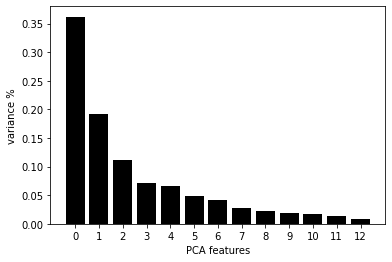

In [ ]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components= 13)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
fa = FactorAnalyzer(n_factors = 13, rotation = 'varimax')
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.34849736, 0.28887994, 0.25090248,
       0.22578864, 0.16877023, 0.10337794])

([<matplotlib.axis.XTick at 0x7ff064aeb110>,
 <a list of 12 Text major ticklabel objects>)

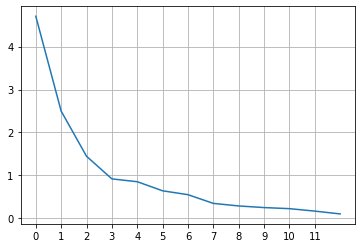

In [ ]:
plt.plot(range(len(ev)), ev)
plt.grid()
plt.xticks(range(12))

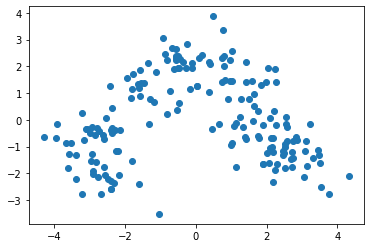

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1])

In [ ]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


<Figure size 7200x7200 with 0 Axes>

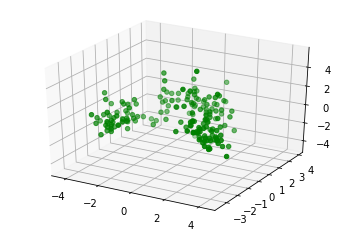

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# Creamos la figurahac
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

x= PCA_components[0]
y = PCA_components[1]
z = PCA_components[2]

ax1.scatter(x,y,z, c='g', marker = 'o')

plt.figure(figsize=(100,100))


establecido el numero de componentes principales, el siguiente paso es implemetnar el algortimo de K-means

In [ ]:
CPusados = PCA_components.iloc[:, 0:3]
CPusados

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [ ]:
CPusados.columns = ['1', '2', '3']

In [ ]:
X = np.array(CPusados)
X.shape

(178, 3)

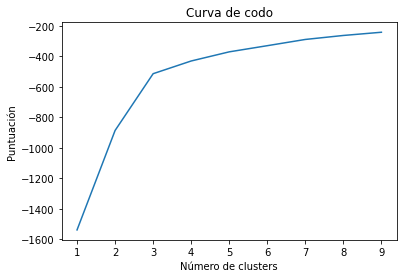

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de codo')
plt.show()

In [ ]:
from pandas.core.common import random_state
kmeans_per_k = [KMeans(n_clusters= k, random_state= 42).fit(X) for k in range(1, 20)]

silhouettescore = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

silhouettescore

[0.3893881308900331,
 0.45379998482576156,
 0.4106780309460924,
 0.3796688345419282,
 0.30776741310572353,
 0.32401371341360946,
 0.29964389603190816,
 0.31181498211395453,
 0.3041757611064434,
 0.29297535765248534,
 0.29956456007392146,
 0.2920214673492897,
 0.3139928720236207,
 0.3047223203071278,
 0.30473441728353995,
 0.3067255374104306,
 0.2865451354317109,
 0.3032002970442947]

In [ ]:
len(silhouettescore)

18

Text(0, 0.5, 'Media del coeficiente de silueta')

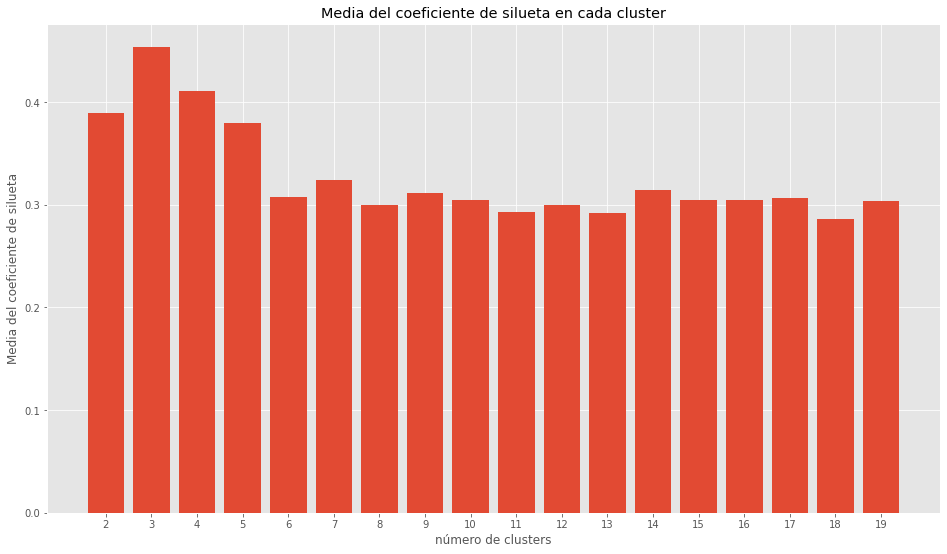

In [ ]:
plt.bar(range(len(silhouettescore)), list(silhouettescore),align='center')
plt.xticks(ticks = range(18), labels = range(2,20))
plt.title('Media del coeficiente de silueta en cada cluster')
plt.xlabel('número de clusters')
plt.ylabel('Media del coeficiente de silueta')

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-7.27201401e-02  1.77754410e+00  1.92644149e-01]
 [ 2.27580813e+00 -8.94517592e-01 -2.15032202e-03]
 [-2.72003575e+00 -1.12565126e+00 -2.39093241e-01]]


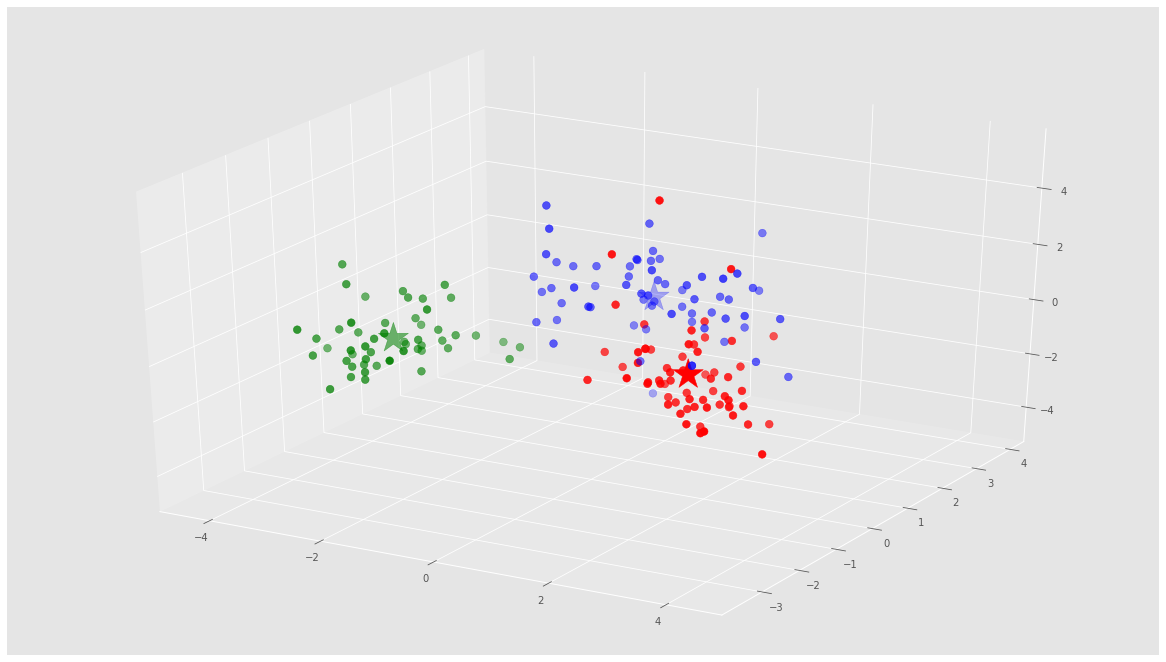

In [ ]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=[ 'blue', 'red', 'green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

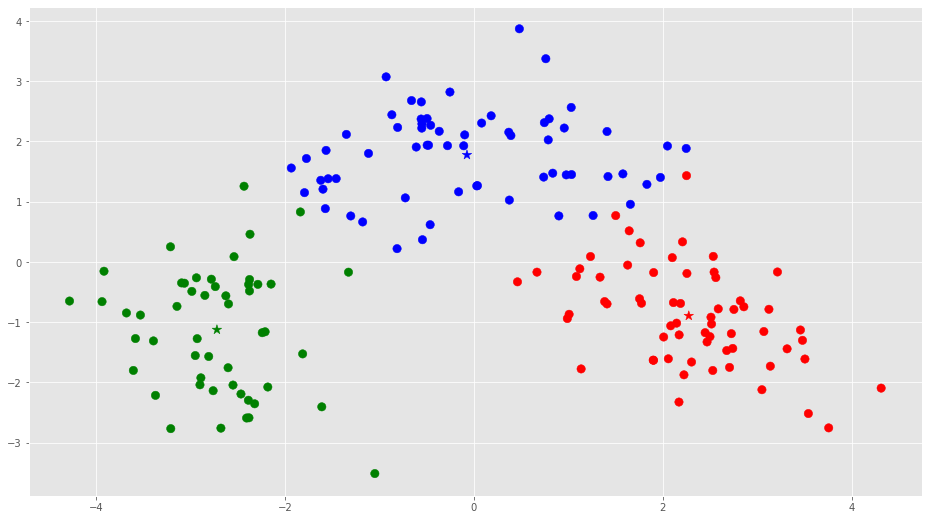

In [ ]:
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=100)
plt.show()

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
C[:, 1]

array([ 1.7775441 , -0.89451759, -1.12565126])